In [2]:
import pandas as pd

# CARGA DE DATOS CSV
cafetera_df = pd.read_csv('analisis_de_datos/cafetera.csv')
licuadora_df = pd.read_csv('analisis_de_datos/licuadora.csv')

# AGREGAR COLUMNA DE ETIQUETA POR CADA DISPOSITIVO
cafetera_df['dispositivo'] = 'cafetera'
licuadora_df['dispositivo'] = 'licuadora'

# COMBINAR DATO EN UN SOLO DATAFRAME
datos_combinados = pd.concat([cafetera_df, licuadora_df])

# GUARDAR ARCHIVO
datos_combinados.to_csv('datos_combinados.csv', index=False)

print(datos_combinados.head())


                 fecha  valor_corriente dispositivo
0  2024-08-16_08-42-01         0.063589    cafetera
1  2024-08-16_08-42-06         7.753287    cafetera
2  2024-08-16_08-42-08         7.720316    cafetera
3  2024-08-16_08-42-10         7.723514    cafetera
4  2024-08-16_08-42-12         7.691499    cafetera


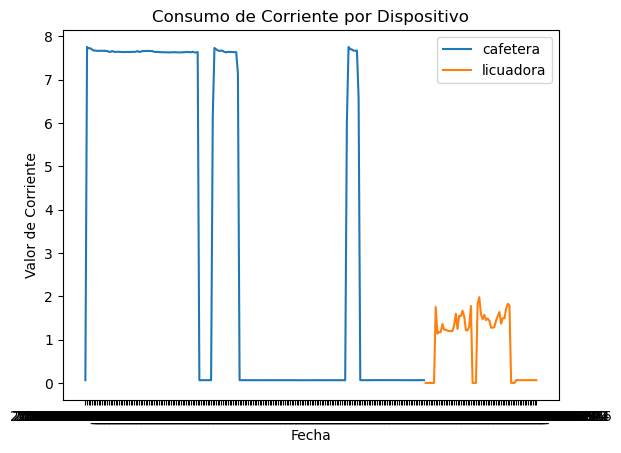

In [3]:
import matplotlib.pyplot as plt

#VISUALIZACION DE CONSUMO POR CADA DISPOSITIVO
for dispositivo in datos_combinados['dispositivo'].unique():
    subset = datos_combinados[datos_combinados['dispositivo'] == dispositivo]
    plt.plot(subset['fecha'], subset['valor_corriente'], label=dispositivo)

plt.xlabel('Fecha')
plt.ylabel('Valor de Corriente')
plt.title('Consumo de Corriente por Dispositivo')
plt.legend()
plt.show()


In [4]:
#EXTRACCION DE CARACTERISTICAS DE CADA DISPOSITIVO, MEDIA, DESVIACION Y PICOS

# Calcular características estadísticas de corriente
def extraer_caracteristicas(df):
    df['media_corriente'] = df['valor_corriente'].rolling(window=5).mean()  # Media en una ventana de 5 muestras
    df['desviacion_corriente'] = df['valor_corriente'].rolling(window=5).std()  # Desviación estándar

    df = df.dropna()  # Elimina valores NaN generados por la ventana de tiempo
    return df

# Aplicar la extracción de características
datos_combinados = extraer_caracteristicas(datos_combinados)

# Selección de características y etiquetas
X = datos_combinados[['media_corriente', 'desviacion_corriente']]
y = datos_combinados['dispositivo']


In [5]:
#DIVISION DE DATOS

from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#ENTRENAMIENTO DEL MODELO RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo de Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[38  0]
 [ 1 15]]
              precision    recall  f1-score   support

    cafetera       0.97      1.00      0.99        38
   licuadora       1.00      0.94      0.97        16

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54



In [10]:
#PREDICCION CON NUEVOS DATOS

# Cargar nuevos datos
datos_generales = pd.read_csv('corrientesGenerales.csv')

# Extraer características
datos_generales = extraer_caracteristicas(datos_generales)

# Predecir el dispositivo de cada registro
X_nuevos = datos_generales[['media_corriente', 'desviacion_corriente']]
predicciones = modelo_rf.predict(X_nuevos)

# Agregar las predicciones al DataFrame
datos_generales['dispositivo_predicho'] = predicciones

# Guardar los resultados en un archivo CSV
datos_generales.to_csv('datos_predicciones.csv', index=False)


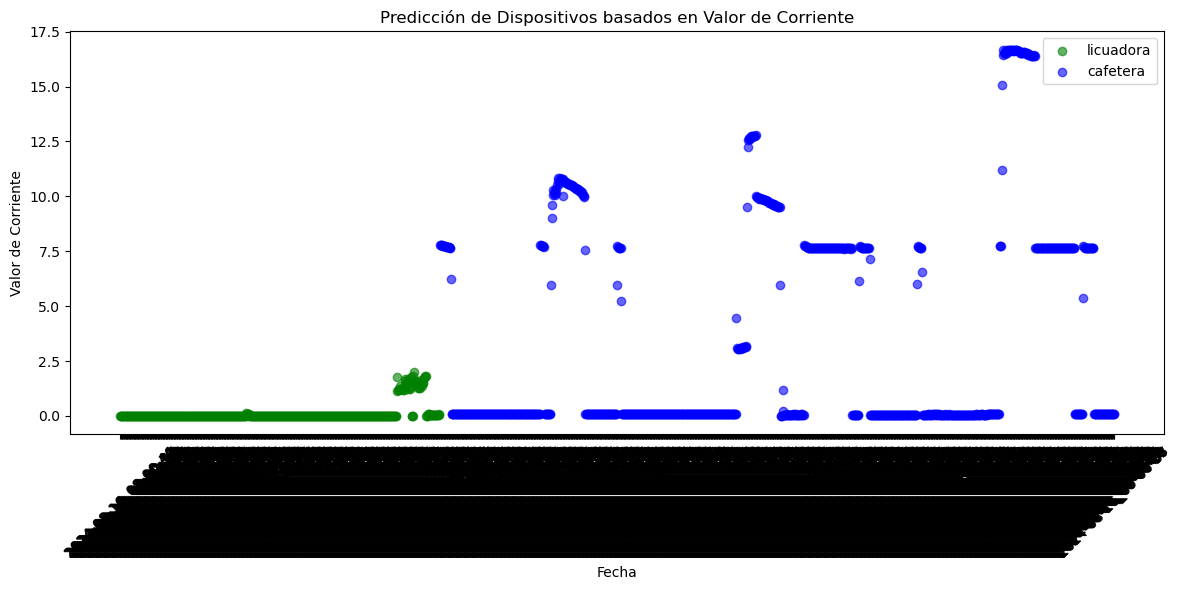

In [11]:
#VISUALIZACION
import matplotlib.pyplot as plt

# Configurar colores para cada dispositivo
colores = {'cafetera': 'blue', 'licuadora': 'green'}

# Crear la gráfica de dispersión
plt.figure(figsize=(12, 6))
for dispositivo in datos_generales['dispositivo_predicho'].unique():
    subset = datos_generales[datos_generales['dispositivo_predicho'] == dispositivo]
    plt.scatter(subset['fecha'], subset['valor_corriente'], label=dispositivo, color=colores[dispositivo], alpha=0.6)

# Configurar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor de Corriente')
plt.title('Predicción de Dispositivos basados en Valor de Corriente')
plt.xticks(rotation=45)
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()
